Imagine we have a client who wants 501 request processed at the same time about various stock information.  The request for information are processed in our machines using a limited resource called a processor.  The processor can process 10 request at the same time.  Each machine has 5 processors.  If the request for information is made after 12:00pm then it is considered peak time and the request will likely be competiting for resources.  Given this, the client will need 25% additional allocation.

this prompt requires various unit conversions, from request to processors to machines and then it requires some consideration for time.

In [1]:
requests = 501

In [2]:
def convert_request_to_processors(requests):
    return requests / 10

In [3]:
convert_request_to_processors(requests)

50.1

We can't have half of a processor, either you have a processor or you don't.  We should round up

In [4]:
import math

In [31]:
def convert_request_to_processors(request):
    return math.ceil(request/10)

In [6]:
convert_request_to_processors(requests)

51

Now we must convert processors to machines

In [7]:
def convert_processors_to_machines(processors):
    return math.ceil(processors / 5)

In [8]:
convert_processors_to_machines(51)

11

If this request is made before 12:00pm then wee need 11 machines to processed 501 requests for stock information at the same time.  If the request if made after 12:00pm then we must consider the additional 25% capacity needed

In [9]:
def peak_time_capacity(machines):
    return math.ceil(machines * .25)

In [10]:
11 + peak_time_capacity(11)

14

Now lets create the UI for these basic calculations, using panel https://panel.holoviz.org/  

In [11]:
import panel as pn
import datetime
pn.extension()

What are our inputs? Requests and Time of day.  

In [12]:
request_input = pn.widgets.IntInput(name='Requests', value=1, step=1, start=1, end=1000000)
time_input = pn.widgets.DatetimeInput(name='Time of request', value=datetime.datetime(2019, 2, 8, 0,0), format ='%H:%M') # requires datetime package

In [13]:
app = pn.Row(request_input,time_input)

In [14]:
app

Row
    [0] IntInput(end=1000000, name='Requests', start=1, value=1)
    [1] DatetimeInput(format='%H:%M', name='Time of request', type=<class 'datetime.datetime'..., value=datetime.datetime(2019, ...)

Now we'll want a function that processes our calculation, a button that triggers than function and a output for calculation

In [15]:
machines_output = pn.widgets.IntInput(name='Machines', value = 0, disabled= True)

In [32]:
def on_click_calculate(event):
    processors = convert_request_to_processors(request_input.value)
    machines = convert_processors_to_machines(processors)
    if time_input.value.time() >= datetime.time(12, 0):
        additional_capacity = peak_time_capacity(machines)
        machines += additional_capacity
    machines_output.value = machines

In [33]:
calculate_button = pn.widgets.Button(name='Calculate', button_type='primary')
calculate_button.on_click(on_click_calculate)

Watcher(inst=Button(button_type='primary', name='Calculate'), cls=<class 'panel.widgets.button.Button'>, fn=<function on_click_calculate at 0x7f147ef022a0>, mode='args', onlychanged=False, parameter_names=('clicks',), what='value', queued=False, precedence=0)

In [34]:
app = pn.Column(pn.Row(request_input,time_input), calculate_button, machines_output)

In [35]:
app.servable()

Column
    [0] Row
        [0] IntInput(end=1000000, name='Requests', start=1, value=1)
        [1] DatetimeInput(format='%H:%M', name='Time of request', type=<class 'datetime.datetime'..., value=datetime.datetime(1900, ...)
    [1] Button(button_type='primary', name='Calculate')
    [2] IntInput(disabled=True, name='Machines', value=11)

Now we have the skeleton of our calculator, lets clean it up, lets turn out notebook into a script
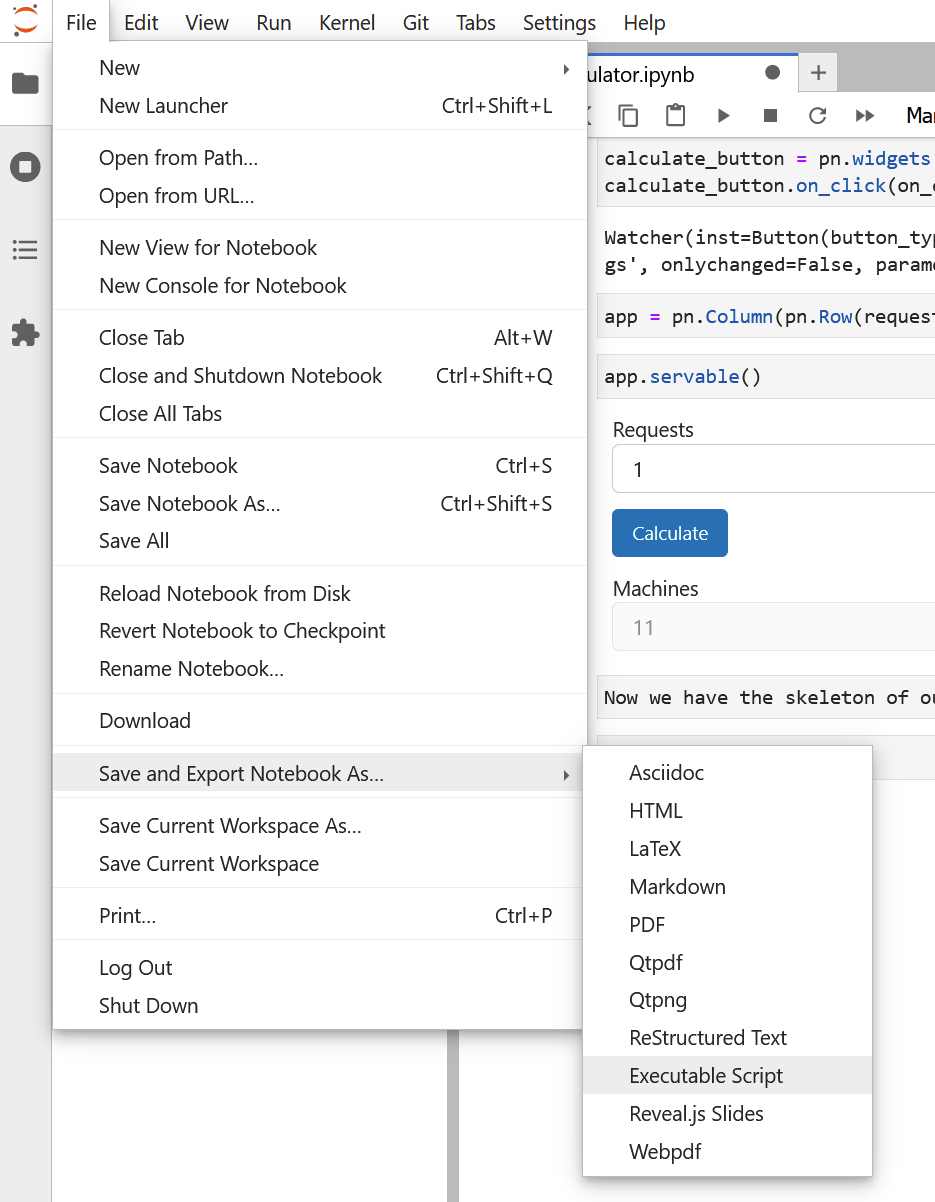

To do this we'll need to convert our functions into a package, using https://packaging.python.org/en/latest/guides/writing-pyproject-toml/

Create a pyproject.toml 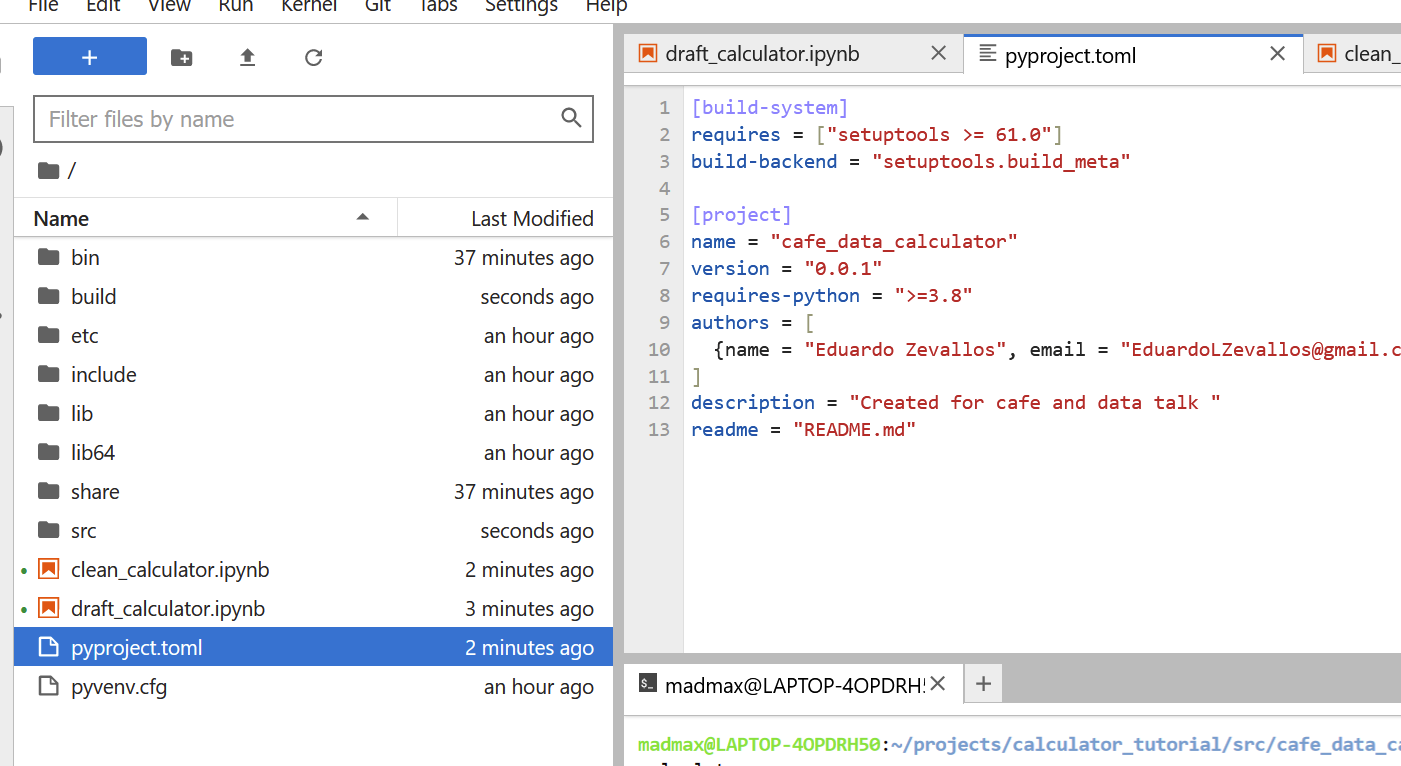

The we can install our package 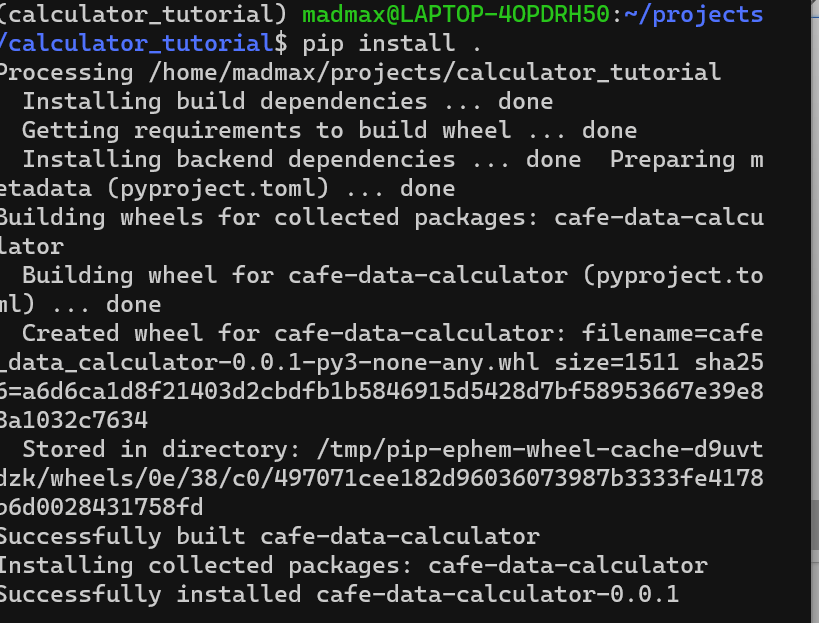

which then lets us import our functions into notebooks

Lets publish our package to testpypi to make sure it works as intended  https://packaging.python.org/en/latest/guides/using-testpypi/  
1 . requires creating an account on https://test.pypi.org 
2.  after creating an account you need to create an api token to upload https://test.pypi.org/manage/account/  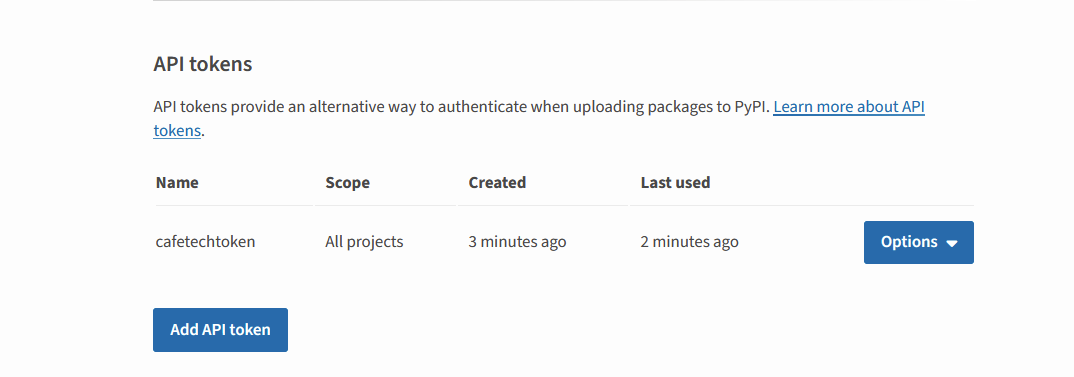
3. Using this token

To use this API token:

    Set your username to __token__
    Set your password to the token value, including the pypi- prefix

For example, if you are using Twine to upload your projects to PyPI, set up your $HOME/.pypirc file like this: 

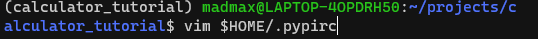 <br> 
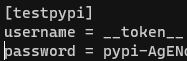 <br>

4. now upload it 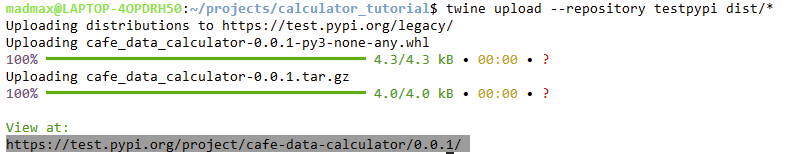
5. https://test.pypi.org/project/cafe-data-calculator/0.0.1/ 
6. opened a new kernel and can now pip install this package 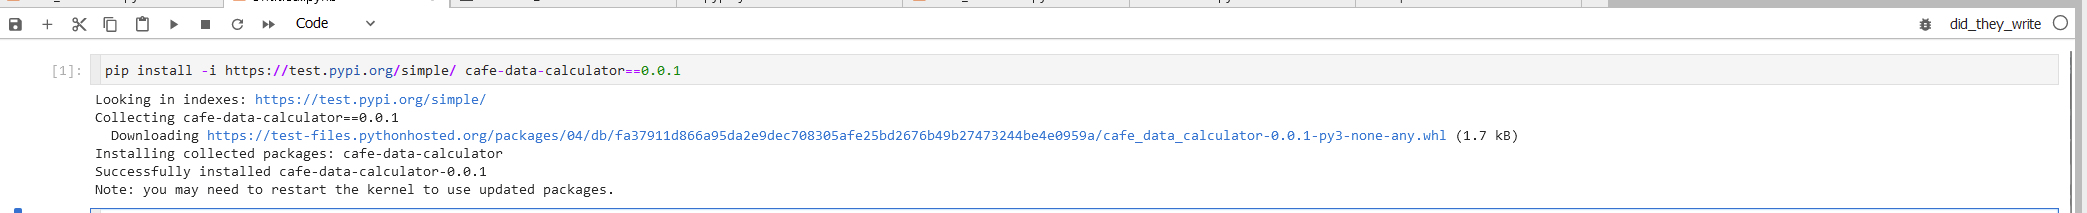 

If we need to make changes to the package we can republish those changes, just make sure to bump the version of the package from 0.0.1 to 0.0.2 <br>
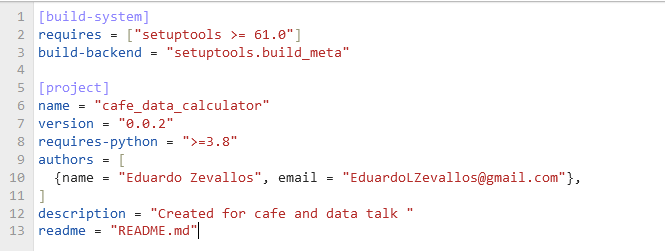 <br>
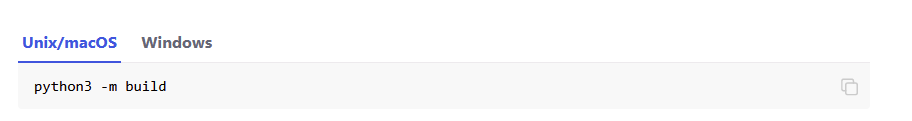 <br>
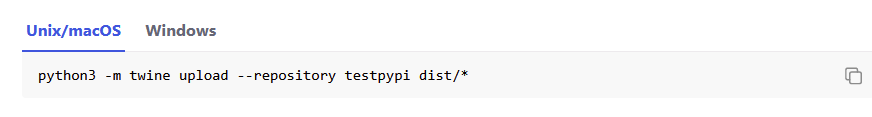  <br>
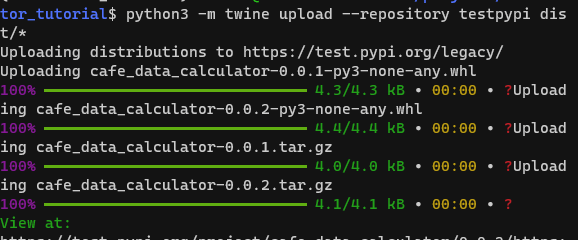 <br>
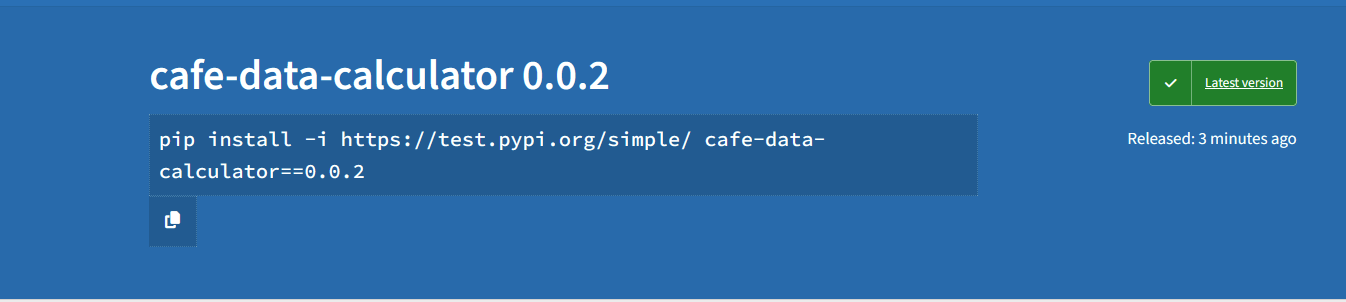 <br>
https://test.pypi.org/project/cafe-data-calculator/0.0.2/

Check that everything is installed correctly, if it is correct we can then upload it to pypi.
1. Similar to testpypi, we'll need to create an account on https://pypi.org/
2. then create an api key https://pypi.org/manage/account/ 
3. add it to pypirc<br>
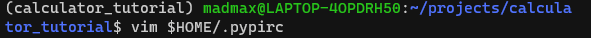 <br>
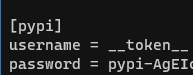 <br>


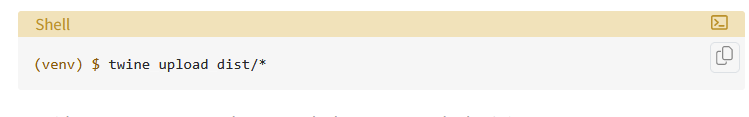 <br>

https://realpython.com/pypi-publish-python-package/#upload-your-package

3. its uploaded https://pypi.org/project/cafe-data-calculator/0.0.2/ 
4. now we can install our package <br>
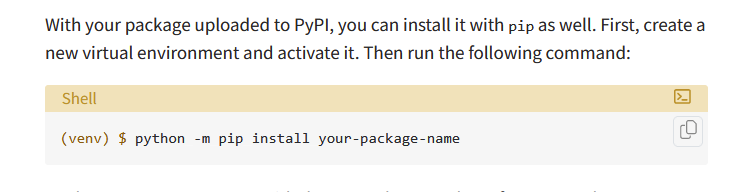
5. lets create a fresh venv <br>

6. lets install <br>
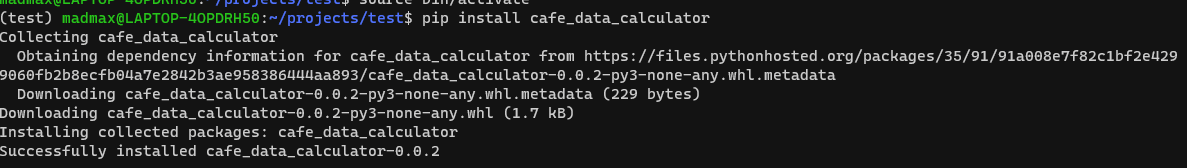 

Now lets deploy our app to https://mybinder.org/ <br>
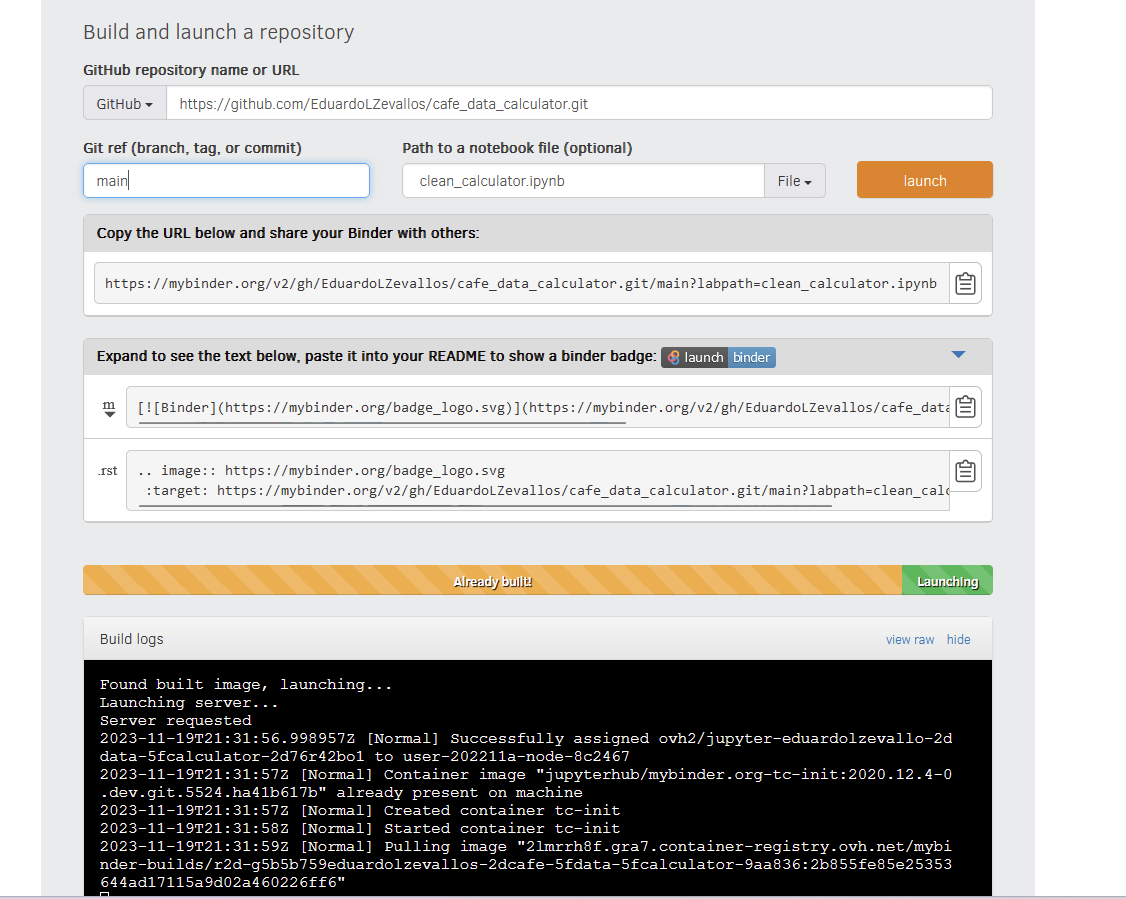